In [1]:
# import modules
import pandas as pd
import numpy as np
import gzip
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# define function for import of images
def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype = np.uint8, offset = 16).reshape(-1, 28, 28).astype(np.float32)

In [3]:
# define function for import of labels
def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype = np.uint8, offset = 8)

In [4]:
# import training data
X_train = open_images(os.getcwd() + "/data/train-images-idx3-ubyte.gz")
y_train = open_labels(os.getcwd() + "/data/train-labels-idx1-ubyte.gz")

In [5]:
# import test data
X_test = open_images(os.getcwd() + "/data/t10k-images-idx3-ubyte.gz")
y_test = open_labels(os.getcwd() + "/data/t10k-labels-idx1-ubyte.gz")

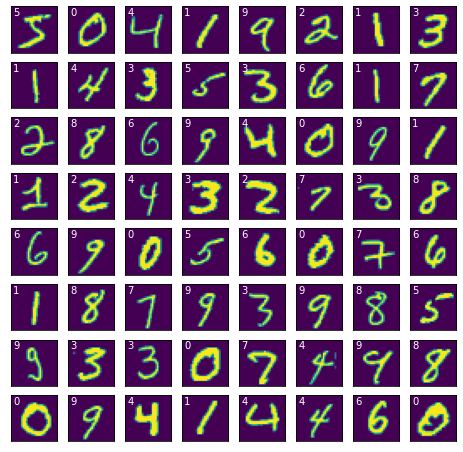

In [6]:
# look at the data
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(X_train[i])
    ax.text(1, 5, str(y_train[i]), color = "w")

<BarContainer object of 10 artists>

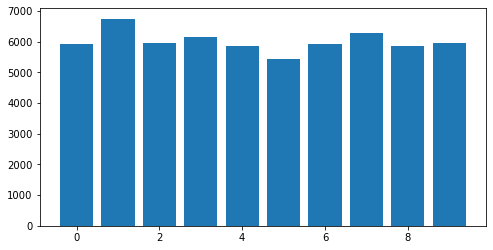

In [7]:
# look at the distribution of numbers in the dataset
dist = np.unique(y_train, return_counts = True)
plt.figure(figsize = (8, 4))
plt.bar(dist[0], dist[1])

In [8]:
# build a simple neural network using keras and tensorflow
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Dense(784, activation = "relu", input_shape = (784,)))
model.add(Dense(10, activation = "softmax"))
# use stochastic gradient decent for optimization
model.compile(optimizer = "adam", 
              loss = "categorical_crossentropy", metrics = ["accuracy"])

2022-04-15 18:51:35.933224: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# train model
history = model.fit(X_train.reshape(60000, 784), y_train, 
                    epochs = 50, batch_size = 1000, verbose = 0)

In [12]:
model.evaluate(X_train.reshape(60000, 784), y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0202 - accuracy: 0.9980


[0.020182445645332336, 0.9980166554450989]

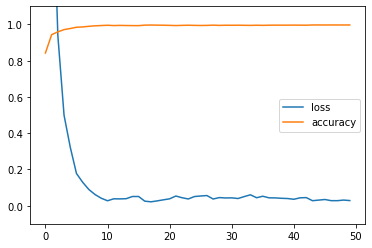

In [13]:
# visualize loss and accuracy of the model
pd.DataFrame(history.history).plot()
plt.ylim(-0.1, 1.1)
plt.show()

In [14]:
# confusion matrix for training data
y_true = pd.Series(np.argmax(y_train, axis = 1), name = "actual")
y_pred = pd.Series(np.argmax(model.predict(X_train.reshape(-1, 784)), axis = 1), name = "preds")
pd.crosstab(y_true, y_pred)

preds,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,5918,0,1,0,0,1,1,1,1,0
1,0,6740,1,1,0,0,0,0,0,0
2,0,2,5950,1,0,0,0,1,3,1
3,0,0,9,6078,0,12,0,6,19,7
4,0,1,2,0,5821,0,0,0,3,15
5,0,1,0,3,0,5410,0,0,6,1
6,0,0,1,0,0,1,5916,0,0,0
7,0,0,0,0,2,0,0,6262,1,0
8,0,6,2,0,0,0,1,0,5842,0


In [15]:
# evaluate model on test data
model.evaluate(X_test.reshape(-1, 784), y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8191 - accuracy: 0.9769


[0.8191168904304504, 0.9768999814987183]

In [16]:
# confusion matrix for test data
y_true = pd.Series(np.argmax(y_test, axis = 1), name = "actual")
y_pred = pd.Series(np.argmax(model.predict(X_test.reshape(-1, 784)), axis = 1), name = "preds")
pd.crosstab(y_true, y_pred)

preds,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,971,0,0,0,0,1,2,1,4,1
1,0,1124,3,1,1,1,2,2,1,0
2,1,1,1009,1,1,0,1,5,12,1
3,0,0,7,968,0,14,0,6,10,5
4,1,1,5,0,952,0,5,3,3,12
5,2,0,0,8,1,869,6,0,5,1
6,2,4,1,0,1,4,941,0,5,0
7,1,3,6,1,1,0,0,1006,5,5
8,4,0,5,1,1,2,1,4,954,2


In [17]:
# using cnn's for better performance
from keras.layers import Conv2D, Flatten

In [35]:
model_cnn = Sequential()
model_cnn.add(Conv2D(15, kernel_size = (5, 5), activation = "relu", input_shape = (28, 28, 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation = "softmax"))
model_cnn.compile(optimizer = "rmsprop", 
                  loss = "categorical_crossentropy", metrics = ["accuracy"])

In [36]:
history_cnn = model_cnn.fit(X_train.reshape(60000, 28, 28, 1), y_train, 
                            epochs = 10, batch_size = 1000, verbose = 0)

In [37]:
model_cnn.evaluate(X_train.reshape(60000, 28, 28, 1), y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0042 - accuracy: 0.9984


[0.004219880793243647, 0.998449981212616]

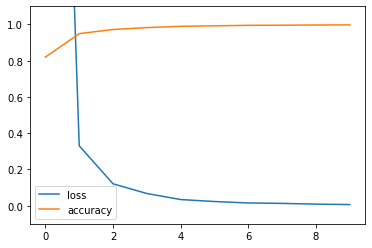

In [38]:
# visualize loss and accuracy of the model
pd.DataFrame(history_cnn.history).plot()
plt.ylim(-0.1, 1.1)
plt.show()

In [39]:
# evaluate model on test data
model_cnn.evaluate(X_test.reshape(10000, 28, 28, 1), y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1569 - accuracy: 0.9771


[0.15686136484146118, 0.9771000146865845]